<a href="https://colab.research.google.com/github/artophili/job-simulation-projects/blob/main/Online_retail_task_by_TATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.isnull().sum()
# ~25% : Missing customer ID

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.shape

(541909, 8)

In [ ]:
df['CustomerID'] = df['CustomerID'].fillna('unknown')

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df['Description'] = df['Description'].fillna('unknown')

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


## Insights that would be valuable to the CEO

In [ ]:
#Sales and performance trend
'''
Key questions to find insights:
What is the total revenue generated over time?
What are the monthly, weekly, and daily sales trends?
What are the peak sales months or seasons?
Are there any patterns in sales by day of the week or time of the day?
'''

'\nKey questions to find insights:\nWhat is the total revenue generated over time?\nWhat are the monthly, weekly, and daily sales trends?\nWhat are the peak sales months or seasons?\nAre there any patterns in sales by day of the week or time of the day?\n'

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df['month'] = df['InvoiceDate'].dt.to_period('M')

In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [ ]:
#Total revenue
df['total_revenue'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,total_revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [ ]:
#Monthly sales
monthly_sales = df.groupby('month')['total_revenue'].sum()

<Axes: title={'center': 'Monthly revenue trend'}, xlabel='month'>

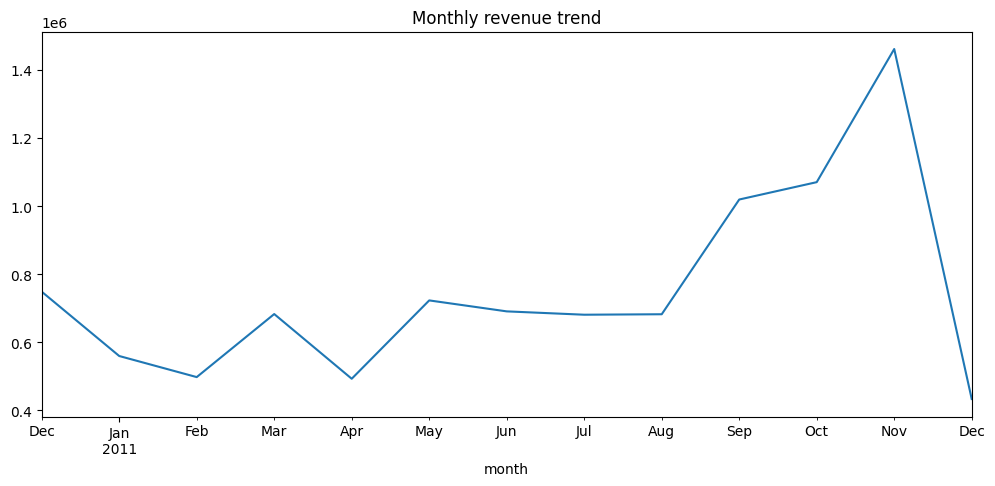

In [ ]:
monthly_sales.plot(kind='line',figsize=(12,5),title='Monthly revenue trend')

In [ ]:
#Highest revenue month : November 2011
#After there was a drop in revenue in december
'''In summer, there are spikes and drops in revenue. From feb to march the revenue increased and then from march to april the revenue decreased.
From april to may again it is increased.

From May to August, the revenue is stable and shows a flat trend.

After august, The revenue showed increasing trend with highest revenue was generated in November.

After November, the revenue showed a sudden decrease in december.

'''


'In summer, there are spikes and drops in revenue. From feb to march the revenue increased and then from march to april the revenue decreased.\nFrom april to may again it is increased.\n\nFrom May to August, the revenue is stable and shows a flat trend.\n\nAfter august, The revenue showed increasing trend with highest revenue was generated in November.\n\nAfter November, the revenue showed a sudden decrease in december.\n\n'

In [ ]:
#Customer analysis

top_customer = df.groupby('CustomerID')['total_revenue'].sum().sort_values(ascending=False).head(10)

In [ ]:
print(top_customer)

CustomerID
unknown    1447682.12
14646.0     279489.02
18102.0     256438.49
17450.0     187482.17
14911.0     132572.62
12415.0     123725.45
14156.0     113384.14
17511.0      88125.38
16684.0      65892.08
13694.0      62653.10
Name: total_revenue, dtype: float64


In [ ]:
#Need to deal with the missing data on priority because while analysing, the unknown shows the highest revenue which is not insightful.

In [ ]:
#Customer with ID 14646 is most valuable customer.
Total_revenue = df['total_revenue'].sum()
print(Total_revenue)

9747747.933999998


In [ ]:
#Percentage of revenue contribution of customer with ID 14646
percent = (279489.02/Total_revenue)*100
print(percent)

2.8672163241434108


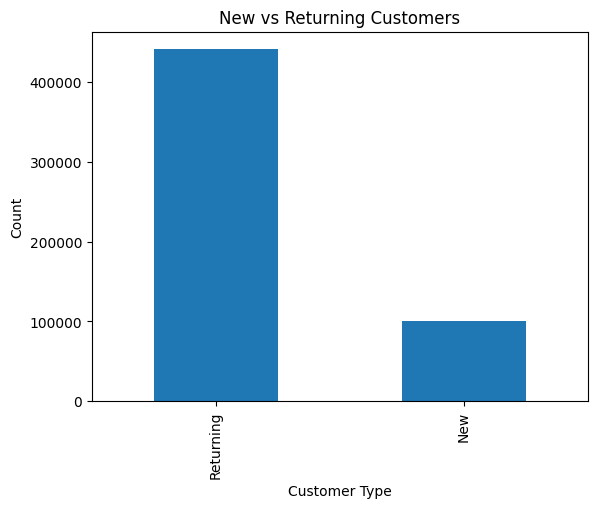

In [ ]:
first_purchase = df.groupby('CustomerID')['InvoiceDate'].min()
df['FirstPurchase'] = df['CustomerID'].map(first_purchase)

df['CustomerType'] = df.apply(lambda row: 'New' if row['InvoiceDate'] == row['FirstPurchase'] else 'Returning', axis=1)

customer_counts = df['CustomerType'].value_counts()
customer_counts.plot(kind='bar', title="New vs Returning Customers")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.show()

In [ ]:
'''There are more than 4,00,000 return customers whereas there are around 1,00,000 approx new customer that means most of the business is dependent on the returning
customers.'''

'There are more than 4,00,000 return customers whereas there are around 1,00,000 approx new customer that means most of the business is dependent on the returning\ncustomers.'

In [ ]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

In [ ]:
top_products

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039
WHITE HANGING HEART T-LIGHT HOLDER,35317
RABBIT NIGHT LIGHT,30680
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26315


In [ ]:
df['InvoiceWeek'] = df['InvoiceDate'].dt.to_period('W')
df['InvoiceDay'] = df['InvoiceDate'].dt.date

In [ ]:
weekly_sales = df.groupby('InvoiceWeek')['total_revenue'].sum()

In [ ]:
daily_sales = df.groupby('InvoiceDay')['total_revenue'].sum()

<Axes: title={'center': 'Weekly revenue trend'}, xlabel='InvoiceWeek'>

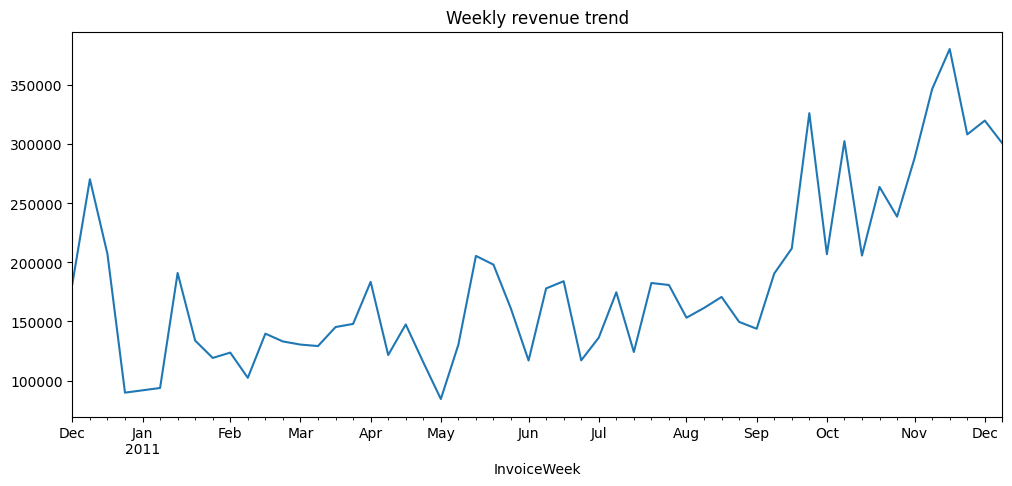

In [ ]:
weekly_sales.plot(kind='line',figsize=(12,5),title='Weekly revenue trend')

<Axes: title={'center': 'Daily revenue trend'}, xlabel='InvoiceDay'>

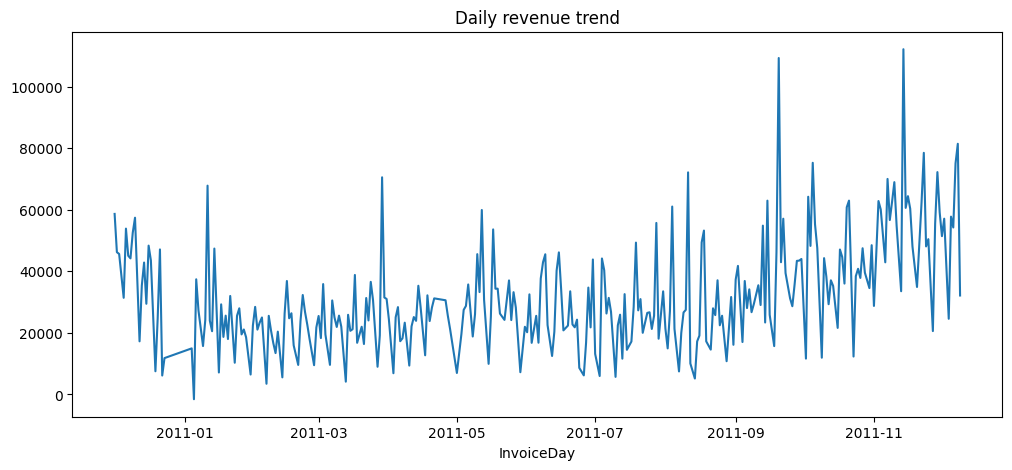

In [ ]:
daily_sales.plot(kind='line',figsize=(12,5),title='Daily revenue trend')

In [ ]:
#The overall sales shows increasing trend.

'''
Initial Drop in Sales (Dec - Jan)

Sales started high in December but declined significantly in early January.
This could indicate strong holiday sales followed by a post-holiday slowdown.
Fluctuations in Mid-Year (Apr - Aug)

Revenue shows multiple spikes and dips, possibly due to seasonal demand variations.
Identifying the cause (e.g., promotions, product launches) could help improve consistency.
Strong Growth from September Onward

Sales show a consistent upward trend from September to December.
This might indicate increased demand during the holiday season or year-end promotions.
High Volatility in Q4 (Oct - Dec)

Sharp fluctuations suggest periods of high sales followed by sudden drops.
This could be due to limited-time promotions, Black Friday, or holiday demand spikes.
'''

In [ ]:
sales_country = df.groupby('Country')['total_revenue'].sum().sort_values(ascending=False)

<Axes: title={'center': 'Country wise sales'}, xlabel='Country'>

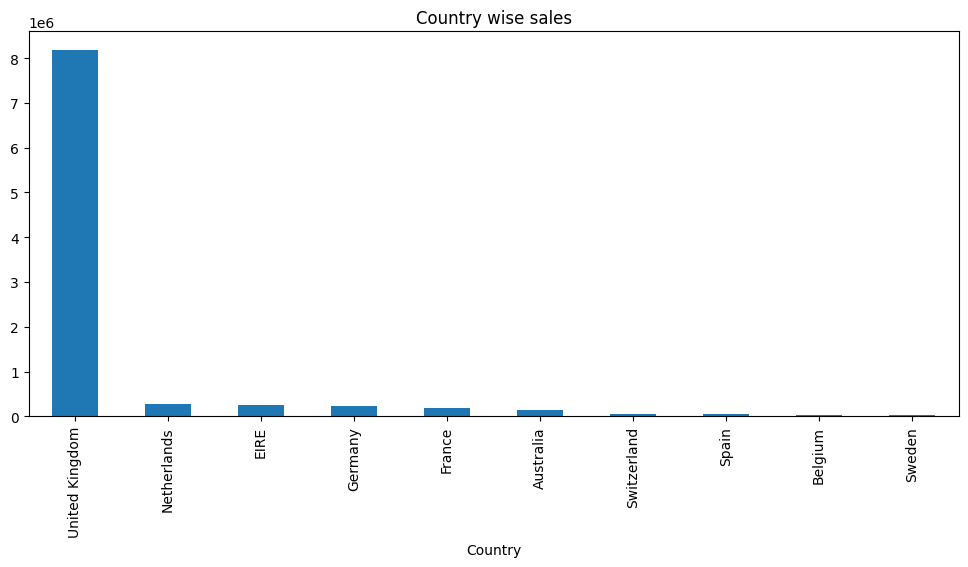

In [ ]:
top_markets = sales_country.head(10)
top_markets.plot(kind='bar',figsize=(12,5),title='Top 10 markets according to sales')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,total_revenue,FirstPurchase,CustomerType,InvoiceWeek,InvoiceDay,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,2010-12-01 08:26:00,New,2010-11-29/2010-12-05,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,New,2010-11-29/2010-12-05,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,2010-12-01 08:26:00,New,2010-11-29/2010-12-05,2010-12-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,New,2010-11-29/2010-12-05,2010-12-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,New,2010-11-29/2010-12-05,2010-12-01,2010-12


In [ ]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [ ]:
country_monthly_sales = df.groupby(['Country','InvoiceMonth'])['total_revenue'].sum().reset_index()

In [ ]:
country_pivot = country_monthly_sales.pivot(index='InvoiceMonth',columns='Country',values='total_revenue').fillna(0)

In [ ]:
top_countries = country_pivot.sum().sort_values(ascending=False).head(5).index
print(top_countries)

Index(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France'], dtype='object', name='Country')


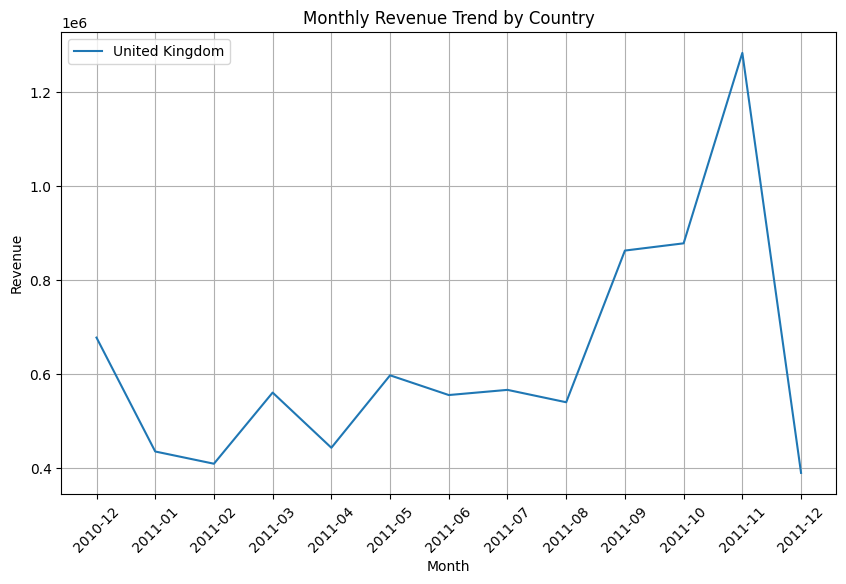

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(country_pivot.index.astype(str), country_pivot[top_countries[0]], label=top_countries[0])

plt.title("Monthly Revenue Trend by Country")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

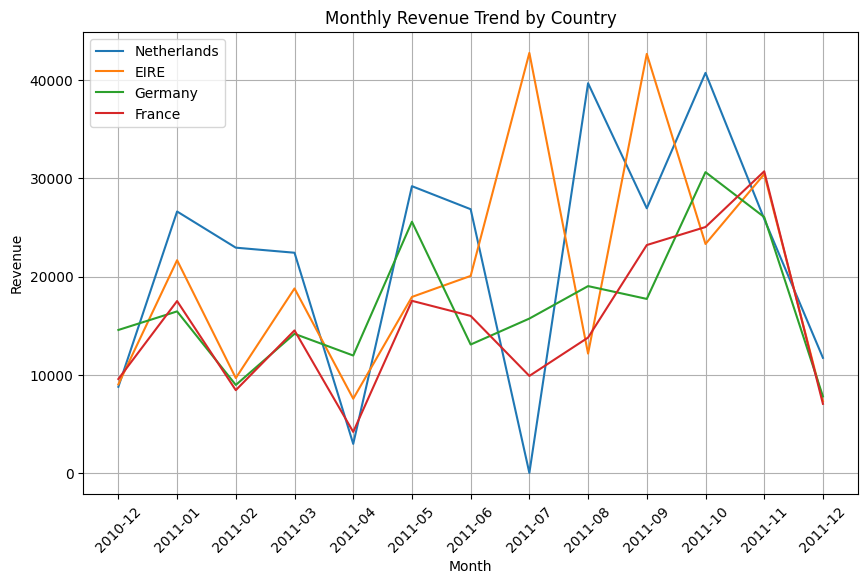

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(1,5):
  plt.plot(country_pivot.index.astype(str), country_pivot[top_countries[i]], label=top_countries[i])

plt.title("Monthly Revenue Trend by Country")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
'''
Revenue fluctuates significantly, showing sharp increases and declines over time.
This suggests seasonal effects, promotions, or external market factors.

EIRE (orange line) and Netherlands (blue line) show sharp spikes in revenue, especially mid-2011.
EIRE has a huge peak in June and October, while the Netherlands peaks in May, September, and October.
This suggests high sales periods, possibly due to local festivals, promotions, or events.

Germany and France have a more gradual increase, particularly after August 2011.
Both countries peak in November 2011, possibly due to holiday sales.

All four countries experience a steep revenue decline in December 2011.
This might be due to seasonal shopping habits (customers buy in Nov and stop in Dec) or data cutoff issues.
'''

In [ ]:
#Growth rate

# Compute Monthly Growth Rate
country_pivot_growth = country_pivot.pct_change().fillna(0) * 100  # Convert to percentage

# Identify Fastest Growing Countries (Average Growth Rate)
avg_growth_rate = country_pivot_growth.mean().sort_values(ascending=False)

# Display Top 5 Fastest Growing Markets
print(avg_growth_rate.head(5))

Country
Unspecified    inf
Norway         inf
Malta          inf
Poland         inf
Lebanon        inf
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [ ]:
#Norway, Malta, Poland, Lebanon are fastest growing markets.
#These markets have a consistent growth and could be high-priority markets for investment.

## Insights that would be valuable to the CMO (Marketing & Customer Engagement)

In [ ]:
top_products

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039
WHITE HANGING HEART T-LIGHT HOLDER,35317
RABBIT NIGHT LIGHT,30680
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26315


In [ ]:
underforming_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).tail(10)

In [ ]:
underforming_products

,Quantity
Description,
thrown away,-4110
incorrect stock entry.,-4320
damages,-4338
throw away,-5368
Damaged,-7540
Printing smudges/thrown away,-9058
check,-12030
unknown,-13609
"Unsaleable, destroyed.",-15644


In [ ]:
'''
Items like "thrown away", "damaged", and "unsaleable, destroyed" indicate that a significant amount of inventory is lost
"Incorrect stock entry" and "check" suggest that some records might be errors in the dataset
'''

In [ ]:
df_filtered = df[~df['Description'].str.contains("throw|damage|unsaleable|check|incorrect|unknown|destroy", case=False, na=False)]
underperforming_products = df_filtered.groupby('Description')['Quantity'].sum().sort_values().head(10)

In [ ]:
underperforming_products

,Quantity
Description,
wrongly marked. 23343 in box,-3100
sold as set on dotcom,-2393
?missing,-2331
??,-1849
wet pallet,-1608
mystery! Only ever imported 1800,-1479
Given away,-1400
?,-1384
missing,-1318


In [ ]:
sales_df = df[df['Quantity'] > 0]   # Only positive sales

In [ ]:
underforming_products = sales_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).tail(10)

In [ ]:
underforming_products

,Quantity
Description,
SCALLOP SHELL SOAP DISH,1
BLUE/NAT SHELL NECKLACE W PENDANT,1
GOLD COSMETICS BAG WITH BUTTERFLY,1
HEN HOUSE W CHICK IN NEST,1
ORANGE/FUSCHIA STONES NECKLACE,1
ETCHED GLASS STAR TREE DECORATION,1
FILIGREE DIAMANTE CHAIN,1
BLOSSOM IMAGES SCRAP BOOK SET,1
MARIE ANTOIENETT TRINKET BOX GOLD,1


In [ ]:
#Basket analysis

basket = sales_df.groupby('InvoiceNo')['Description'].apply(list)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
te = TransactionEncoder()
te_array = te.fit(basket).transform(basket)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_encoded = pd.DataFrame(te_array,columns=te.columns_)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_encoded.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,taig adjust,test,to push order througha s stock was,unknown,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
258,0.109031,(WHITE HANGING HEART T-LIGHT HOLDER)
98,0.100926,(JUMBO BAG RED RETROSPOT)
191,0.095957,(REGENCY CAKESTAND 3 TIER)
152,0.081339,(PARTY BUNTING)
123,0.075453,(LUNCH BAG RED RETROSPOT)
15,0.070195,(ASSORTED COLOUR BIRD ORNAMENT)
210,0.066818,(SET OF 3 CAKE TINS PANTRY DESIGN )
144,0.063682,(PACK OF 72 RETROSPOT CAKE CASES)
116,0.061415,(LUNCH BAG BLACK SKULL.)
134,0.060257,(NATURAL SLATE HEART CHALKBOARD )


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by="lift", ascending=False).head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
144,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.037051,0.036955,0.026148,0.705729,19.097068,1.0,0.024779,3.272649,0.984098,0.546371,0.694437,0.706650
145,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.036955,0.037051,0.026148,0.707572,19.097068,1.0,0.024779,3.292941,0.983999,0.546371,0.696320,0.706650
146,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.048968,0.028898,0.026148,0.533990,18.478377,1.0,0.024733,2.083866,0.994585,0.505597,0.520123,0.719416
143,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.028898,0.048968,0.026148,0.904841,18.478377,1.0,0.024733,9.994183,0.974030,0.505597,0.899942,0.719416
22,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.036955,0.048968,0.030538,0.826371,16.875875,1.0,0.028729,5.477375,0.976843,0.551394,0.817431,0.725008
23,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.048968,0.036955,0.030538,0.623645,16.875875,1.0,0.028729,2.558877,0.989182,0.551394,0.609203,0.725008
147,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.051428,0.030538,0.026148,0.508443,16.649292,1.0,0.024578,1.972225,0.990897,0.468453,0.492959,0.682341
142,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.030538,0.051428,0.026148,0.856240,16.649292,1.0,0.024578,6.598308,0.969546,0.468453,0.848446,0.682341
21,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.036569,0.044047,0.026341,0.720317,16.353475,1.0,0.024730,3.417984,0.974487,0.485333,0.707430,0.659173
20,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.044047,0.036569,0.026341,0.598028,16.353475,1.0,0.024730,2.396765,0.982110,0.485333,0.582771,0.659173
